In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
data = pd.read_csv(r'C:\D\Project\TechAnalogy\Dataset\Data.csv')


In [21]:
data

,Lead_ID,Location,College,Year Of Study,Program Intrest,Lead Source
0,LD1,Ahmedabad,IIT Delhi,2nd,Data Science,College Colloboration
1,LD2,Ahmedabad,IIT Delhi,4th,Artificial Intelligence,Instagram
2,LD3,Delhi,IIT Delhi,4th,Data Science,Google Form
3,LD4,Bangalore,VNIT Nagpur,4th,Human Resource,Instagram
4,LD5,Raipur,BIITS Raipur,4th,Computer Science,Linkedin
...,...,...,...,...,...,...
19995,LD19996,Ahmedabad,IIT Bombay,4th,Finance,Linkedin
19996,LD19997,Nagpur,IIT Bombay,3rd,Human Resource,Linkedin
19997,LD19998,Mumbai,IIM A,4th,Finance,Google Form
19998,LD19999,Ahmedabad,IIT Bombay,1st,Computer Science,Whatsapp


In [22]:
data.head(20)

,Lead_ID,Location,College,Year Of Study,Program Intrest,Lead Source
0,LD1,Ahmedabad,IIT Delhi,2nd,Data Science,College Colloboration
1,LD2,Ahmedabad,IIT Delhi,4th,Artificial Intelligence,Instagram
2,LD3,Delhi,IIT Delhi,4th,Data Science,Google Form
3,LD4,Bangalore,VNIT Nagpur,4th,Human Resource,Instagram
4,LD5,Raipur,BIITS Raipur,4th,Computer Science,Linkedin
5,LD6,Bangalore,IIM A,3rd,Computer Science,Google Form
6,LD7,Ahmedabad,IIIT Hyderabad,2nd,Human Resource,Google Form
7,LD8,Delhi,BIITS Raipur,3rd,Finance,Instagram
8,LD9,Mumbai,IIM A,1st,Human Resource,Instagram
9,LD10,Ahmedabad,Ramdeobaba Univerisity,3rd,Finance,Linkedin


#### Grouping and Analysing the data

# 2. Demographic Analysis:

In [23]:
#Grouping by Location and Lead Source
location_analysis= data.groupby(['Location','Lead Source']).size().unstack()



In [24]:
location_analysis

Lead Source,College Colloboration,Google Form,Instagram,Linkedin,Whatsapp
Location,,,,,
Ahmedabad,597,590,562,582,568
Bangalore,608,561,582,540,573
Delhi,586,586,547,556,586
Hyderabad,583,546,592,595,597
Mumbai,560,624,571,564,529
Nagpur,553,575,536,548,559
Raipur,557,599,567,570,551


# 3. Program Analysis

In [25]:
# year of study analysis

year_analysis = data['Year Of Study'].value_counts()

In [26]:
year_analysis

Year Of Study
1st    5120
2nd    5037
3rd    4932
4th    4911
Name: count, dtype: int64

In [28]:
program_counts = data['Program Intrest'].value_counts()
program_counts

Program Intrest
Artificial Intelligence    3383
Computer Science           3380
Finance                    3332
Data Science               3307
Robotics                   3303
Human Resource             3295
Name: count, dtype: int64

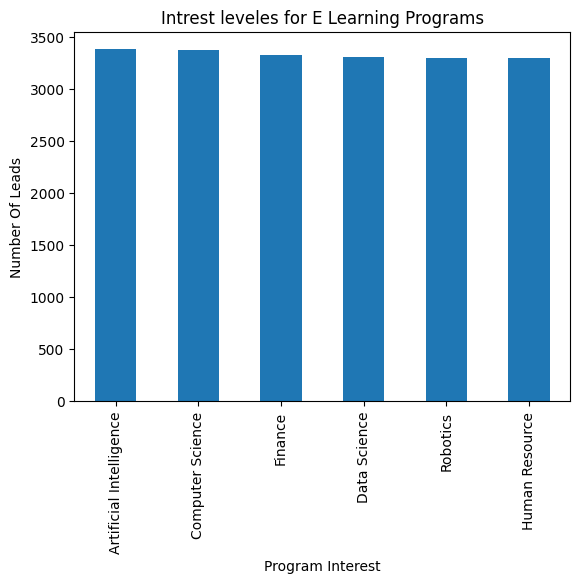

In [30]:
program_counts.plot(kind='bar')
plt.title('Intrest leveles for E Learning Programs')
plt.xlabel('Program Interest')
plt.ylabel('Number Of Leads')
plt.show()

There is no such major differntiating or anomalies in the dataset based on `Program Intrest` & `Leads`

In [34]:
# Grouping by Program Interest and Year of Study
demographic_analysis = data.groupby(['Program Intrest', 'Year Of Study']).size().unstack()


In [35]:
demographic_analysis

Year Of Study,1st,2nd,3rd,4th
Program Intrest,,,,
Artificial Intelligence,884,854,830,815
Computer Science,840,861,821,858
Data Science,820,863,845,779
Finance,902,813,809,808
Human Resource,826,831,816,822
Robotics,848,815,811,829


Data Seems to be very balance and equally distributed

Calculating and Making Recommendations


In [36]:
recommendations = {}
for program in program_counts.index:
    year_data = demographic_analysis.loc[program]
    
    # based on max value 
    target_year = year_data.idxmax() 
    recommendations[program] = target_year

In [37]:
print("Recommendations for Targeting Demographics:")
for program, year in recommendations.items():
    print(f"Target {year} students for the {program} program.")

Recommendations for Targeting Demographics:
Target 1st students for the Artificial Intelligence program.
Target 2nd students for the Computer Science program.
Target 1st students for the Finance program.
Target 2nd students for the Data Science program.
Target 1st students for the Robotics program.
Target 2nd students for the Human Resource program.


## 4. Projections and Predictions:

! Assumptions/Predictions : 
Assuming a hypothetical Conversion rates

In [38]:
conversion_rates={
    'Data Science' : 0.15,
    'Robotics' : 0.05,
    'Artificial Intelligence' : 0.20,
    'Human Resource' : 0.10,
    'Computer Science' : 0.05,
    'Finance' : 0.15
}

In [41]:
projected_leads = data['Program Intrest'].value_counts()
projected_coversions = projected_leads * projected_leads.index.map(conversion_rates)

In [42]:
conversion_df = pd.DataFrame({
    'Projected Leads' : projected_leads,
    'Projected Conversions' : projected_coversions
})

In [43]:
conversion_df

,Projected Leads,Projected Conversions
Program Intrest,,
Artificial Intelligence,3383,676.60
Computer Science,3380,169.00
Finance,3332,499.80
Data Science,3307,496.05
Robotics,3303,165.15
Human Resource,3295,329.50


### Now for furthure marketing Calculations,
* We are assuming Total Marketing Budget = 100000


In [44]:
total_budget= 100000

In [45]:
budget_allocations={}

In [46]:
for program in projected_leads.index:
    budget_allocations[program] = (projected_coversions[program] / projected_coversions.sum()) * total_budget

In [48]:
print("Budget Allocation Strategy:")
for program , budget in budget_allocations.items():
    print(f"Allocate INR{budget: .2f} for {program} program.")

Budget Allocation Strategy:
Allocate INR 28962.80 for Artificial Intelligence program.
Allocate INR 7234.28 for Computer Science program.
Allocate INR 21394.63 for Finance program.
Allocate INR 21234.11 for Data Science program.
Allocate INR 7069.47 for Robotics program.
Allocate INR 14104.70 for Human Resource program.


<Figure size 1000x600 with 0 Axes>

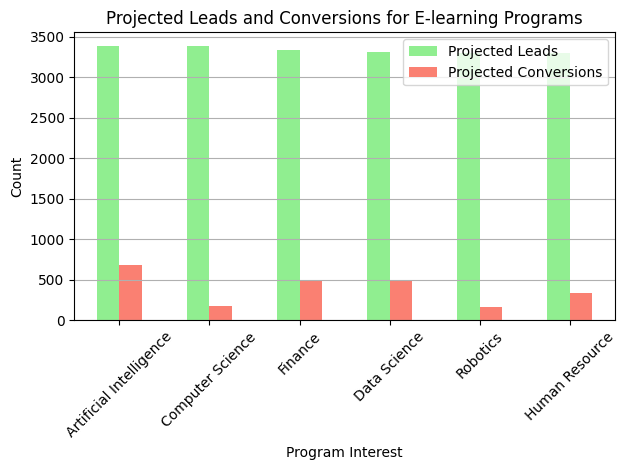

In [49]:
plt.figure(figsize=(10, 6))
conversion_df[['Projected Leads', 'Projected Conversions']].plot(kind='bar', color=['lightgreen', 'salmon'])

plt.title('Projected Leads and Conversions for E-learning Programs')

plt.xlabel('Program Interest')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(["Projected Leads", "Projected Conversions"])
plt.tight_layout()  
plt.show()

The Graphs are ploted according to the conversion rates (Which we have assumed)